This project is part of Kaggle 'House prices' competition. I will try to built model which will be predict house prices based of house parameters. <br>
Data description in details are in file 'data_description.txt' in catalogue with this file.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scikitplot.plotters import plot_learning_curve
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from ml_metrics import rmsle

In [3]:
pd.set_option('display.max_column', None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Load data

Load train and test data and let's have a first look to it. In train part exist target variable 'SalePrice', in test - no.

In [282]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [124]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [10]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

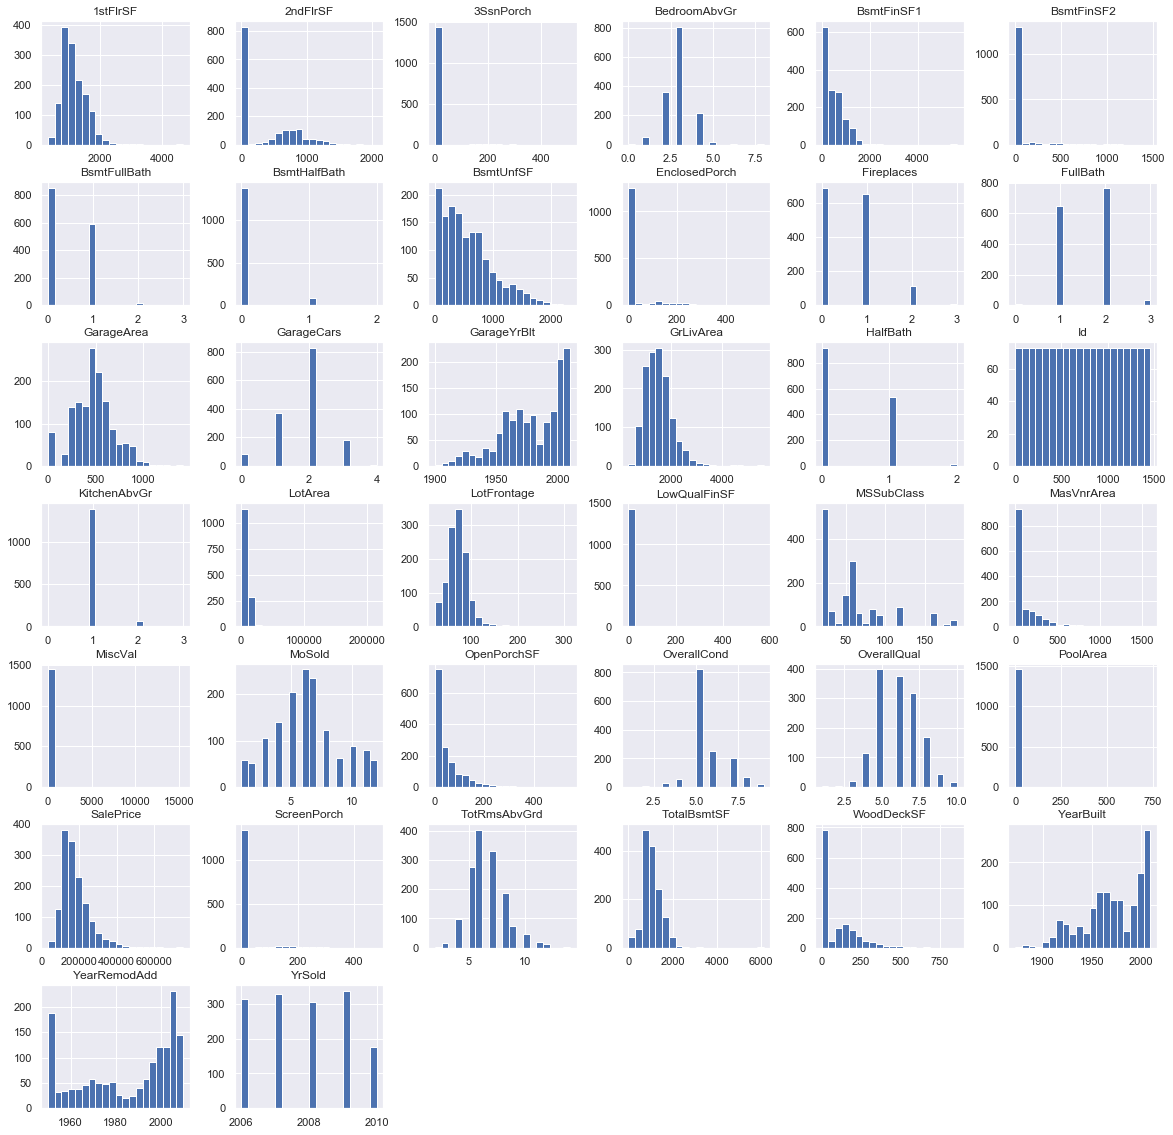

In [12]:
train.hist(figsize=(20, 20), bins=20);

### Cleaning data


So, I'm going to join train and test data in order to avoid duplicating code when I will clean data. And later I will saparate it before training.

In [283]:
# Save train and test ID for final prediction on test part
train_id = train.pop('Id')
test_id = test.pop('Id')

# Save train length 
train_index = train.shape[0]

data_frame = pd.concat([train, test])
data_frame.reset_index(inplace=True, drop=True)

In [284]:
# Set target variable and drop it from dataset
target = train['SalePrice']
data_frame.drop(['SalePrice'], axis=1, inplace=True)

In [285]:
data_frame.shape

(2919, 79)

In [171]:
# Check empty values
data_frame.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
Electrical          1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Exterior1st         1
GarageArea          1
TotalBsmtSF         1
                 ... 
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchS

In PoolQC, MiscFeature, Alley, Fence most of data is missing. We can drop all these columns, but on the other hand we can try to fill these empty values. Because follow to description data in features as PoolQC, Fecne, FireplaceQC "NaN" means 'No pool', 'No fence' and etc. So, for record where pool or fence are available it can effect on price. Therefore I will replace Nan on NA.

In [131]:
data_frame['Fence'].value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [132]:
data_frame['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [133]:
data_frame['MiscFeature'].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [287]:
clean_data = data_frame.copy()

In [288]:
for x in ('MiscFeature', 'PoolQC', 'Alley', 'Fence', 'FireplaceQu'):
    clean_data[x] = clean_data[x].fillna('NA')

In [289]:
 clean_data[clean_data['GarageYrBlt'].isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
39,1152,0,0,NA,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NA,NA,0,PConc,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NA,0,6,Edwards,0,5,4,N,0,NA,CompShg,Gable,AdjLand,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
48,736,716,0,NA,2,2fmCon,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,736.0,Y,Norm,Norm,SBrkr,102,TA,TA,MetalSd,MetalSd,NA,NA,0,BrkTil,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1452,0,GasA,Gd,2Story,3,TA,Lvl,Gtl,4456,Inside,33.0,Reg,0,190,RM,0.0,None,NA,0,6,OldTown,0,5,4,N,0,NA,CompShg,Gable,Partial,New,0,Pave,8,736.0,AllPub,0,1920,2008,2009
78,1768,0,0,NA,4,Duplex,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1768.0,N,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,NA,NA,0,CBlock,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1768,0,GasA,TA,1Story,2,TA,Lvl,Gtl,10778,Inside,72.0,Reg,0,90,RL,0.0,None,NA,0,4,Sawyer,0,5,4,Y,0,NA,CompShg,Hip,Normal,WD,0,Pave,8,1768.0,AllPub,0,1968,1968,2010
88,1013,0,0,NA,2,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1013.0,N,Feedr,Feedr,SBrkr,156,Fa,Fa,Plywood,Plywood,MnPrv,NA,0,CBlock,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1526,0,GasA,TA,1.5Fin,1,Fa,Lvl,Gtl,8470,Corner,105.0,IR1,513,50,C (all),0.0,None,NA,0,10,IDOTRR,0,2,3,N,0,NA,CompShg,Hip,Abnorml,ConLD,0,Pave,6,1013.0,AllPub,0,1915,1982,2009
89,990,0,0,NA,3,1Fam,TA,No,588.0,0.0,GLQ,Unf,1.0,0.0,Gd,402.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NA,NA,0,PConc,1,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,990,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,8070,Inside,60.0,Reg,0,20,RL,0.0,None,NA,0,8,CollgCr,0,5,4,Y,0,NA,CompShg,Gable,Normal,WD,0,Pave,5,990.0,AllPub,0,1994,1995,2007


Where 'GarageYrBlt' equals 'NaN', there other empty 'garage' values is empty, as well. Follow desciription data it means no garage. 

In [290]:
# Numerical features replace with number
clean_data['GarageYrBlt'].fillna(0, inplace=True) 

# Feature replace with 'NA'
for x in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    clean_data[x] = clean_data[x].fillna('NA')

In [291]:
clean_data[clean_data['BsmtExposure'].isnull()][:5]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
17,1296,0,0,NA,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NA,NA,0,Slab,2,Typ,516.0,2.0,TA,Unf,TA,CarPort,1967.0,1296,0,GasA,TA,1Story,2,TA,Lvl,Gtl,10791,Inside,72.0,Reg,0,90,RL,0.0,None,Shed,500,10,Sawyer,0,5,4,Y,0,NA,CompShg,Gable,Normal,WD,0,Pave,6,0.0,AllPub,0,1967,1967,2006
39,1152,0,0,NA,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseP,0,TA,TA,AsbShng,Plywood,NA,NA,0,PConc,2,Typ,0.0,0.0,NA,NA,NA,NA,0.0,1152,0,GasA,TA,1Story,2,Fa,Lvl,Gtl,6040,Inside,65.0,Reg,0,90,RL,0.0,None,NA,0,6,Edwards,0,5,4,N,0,NA,CompShg,Gable,AdjLand,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
90,1040,0,0,NA,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseA,0,TA,TA,BrkFace,Wd Sdng,NA,NA,0,Slab,1,Typ,420.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NA,0,7,NAmes,29,5,4,Y,0,NA,CompShg,Gable,Normal,WD,0,Pave,4,0.0,AllPub,0,1950,1950,2006
102,1535,0,0,NA,4,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,SBrkr,0,Fa,TA,HdBoard,HdBoard,NA,NA,0,Slab,2,Typ,410.0,2.0,TA,Unf,TA,Attchd,1979.0,1535,0,GasA,TA,1Story,2,TA,Bnk,Gtl,7018,Inside,64.0,Reg,0,90,RL,0.0,None,NA,0,6,SawyerW,0,5,5,Y,0,NA,CompShg,Gable,Alloca,WD,0,Pave,8,0.0,AllPub,0,1979,1979,2009
156,1040,0,0,NA,2,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,Y,Norm,Norm,FuseF,0,TA,TA,Wd Sdng,Wd Sdng,NA,NA,0,CBlock,1,Typ,625.0,2.0,TA,Unf,TA,Detchd,1950.0,1040,0,GasA,TA,1Story,1,TA,Lvl,Gtl,7200,Inside,60.0,Reg,0,20,RL,0.0,None,NA,0,6,NAmes,0,7,5,Y,0,NA,CompShg,Hip,Normal,WD,0,Pave,5,0.0,AllPub,0,1950,1950,2006


The same situation as above: where 'BsmtExposure' is 'null', there other 'Bsmt' features are 'null', as well.

In [292]:
for x in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    clean_data[x] = clean_data[x].fillna('NA')

In [294]:
clean_data[clean_data['LotFrontage'].isnull()].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
7,1107,983,0,NA,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,NA,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,Ex,2Story,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,NA,CompShg,Gable,Normal,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
12,912,0,0,NA,2,1Fam,TA,No,737.0,0.0,ALQ,Unf,1.0,0.0,TA,175.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Plywood,NA,NA,0,CBlock,1,Typ,352.0,1.0,TA,Unf,TA,Detchd,1962.0,912,0,GasA,TA,1Story,1,TA,Lvl,Gtl,12968,Inside,NaN,IR2,0,20,RL,0.0,None,NA,0,9,Sawyer,0,6,5,Y,0,NA,CompShg,Hip,Normal,WD,176,Pave,4,912.0,AllPub,140,1962,1962,2008
14,1253,0,0,NA,2,1Fam,TA,No,733.0,0.0,BLQ,Unf,1.0,0.0,TA,520.0,Y,Norm,Norm,SBrkr,176,TA,TA,MetalSd,MetalSd,GdWo,Fa,1,CBlock,1,Typ,352.0,1.0,TA,RFn,TA,Attchd,1960.0,1253,1,GasA,TA,1Story,1,TA,Lvl,Gtl,10920,Corner,NaN,IR1,0,20,RL,212.0,BrkFace,NA,0,5,NAmes,213,5,6,Y,0,NA,CompShg,Hip,Normal,WD,0,Pave,5,1253.0,AllPub,0,1960,1960,2008
16,1004,0,0,NA,2,1Fam,TA,No,578.0,0.0,ALQ,Unf,1.0,0.0,TA,426.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,NA,TA,1,CBlock,1,Typ,480.0,2.0,TA,Fin,TA,Attchd,1970.0,1004,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,11241,CulDSac,NaN,IR1,0,20,RL,180.0,BrkFace,Shed,700,3,NAmes,0,7,6,Y,0,NA,CompShg,Gable,Normal,WD,0,Pave,5,1004.0,AllPub,0,1970,1970,2010
24,1060,0,0,NA,3,1Fam,TA,Mn,188.0,668.0,Rec,ALQ,1.0,0.0,TA,204.0,Y,Norm,Norm,SBrkr,0,Gd,TA,Plywood,Plywood,MnPrv,TA,1,CBlock,1,Typ,270.0,1.0,TA,Unf,TA,Attchd,1968.0,1060,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,8246,Inside,NaN,IR1,0,20,RL,0.0,None,NA,0,5,Sawyer,90,8,5,Y,0,NA,CompShg,Gable,Normal,WD,0,Pave,6,1060.0,AllPub,406,1968,2001,2010


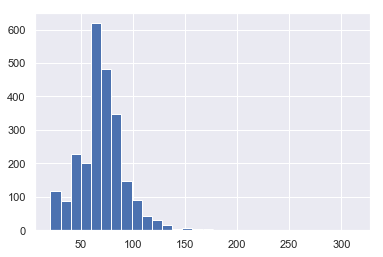

In [295]:
clean_data['LotFrontage'].hist(bins=30);

For 'LotFrontage' we have 259 empty records, there are too many to delete. And we can see that there are no values  equal to 0. So we can try to fill these empty values with median (because we have some outliers).

In [296]:
median = clean_data['LotFrontage'].median()
clean_data['LotFrontage'].fillna(median, inplace=True)

Now, I'm going to fill rest numeric values with 0 and categorical values with 'None' or with most occurring value.

In [181]:
numbers = ('MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF')
objects = ('MasVnrType', 'MSZoning', 'Utilities', 'Functional', 'Electrical', 'Exterior2nd', 'KitchenQual', 'Exterior1st', 'SaleType')

# Check distribution for object feats 
for feat in objects:
    print(feat)
    print(data[feat].value_counts())
    print()

MasVnrType
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Utilities
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdn

In [297]:
# Fill last empty numeric values with 0
for feat in numbers:
    clean_data[feat] = clean_data[feat].fillna(0)

# Fill last empty object values with most occuring value    
for feat in objects:
    if feat != 'MasVnrType':
        clean_data[feat] = clean_data[feat].fillna(clean_data[feat].mode()[0])

# Fill with None 
clean_data['MasVnrType'] = clean_data['MasVnrType'].fillna('None')

In [298]:
clean_data.isnull().sum().sort_values(ascending=False)

YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
FullBath         0
Electrical       0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
EnclosedPorch    0
Condition2       0
GrLivArea        0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
                ..
SaleType         0
Neighborhood     0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
Utilities        0
WoodDeckSF       0
YearBuilt        0
OpenPorchSF      0
MoSold           0
Heating          0
LotConfig        0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotFrontage      0
MiscVal     

In [299]:
clean_data.shape

(2919, 79)

### Categorical data

So, now we don't have empty values. Let's transform categorical data to numbers. <br>
I will use 3 methods: <br>
- Label encoder (I've used function factorize)
- Dummies
- And for features with clear scale I will map these feature <br>

In fact, some numerical features as 'MSSubClass' or 'MoSold' are categorical variables. <br>
For label encoder and dummies I've done many trial and error to decide which will be transform with dummies or encoder, but generally for label encoder I choose features with less possible values or above features which I convert from numbers to strings.

In [300]:
# Transform numbers to categorical
for x in ('MSSubClass', 'MoSold'):
    clean_data[x] = clean_data[x].astype('str')

In [301]:
# Generally we have 3 main feature types with scale
rates_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
rates_basmtype = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': -1, 'NA': 0}
rates_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': -1, 'NA': 0}

In [302]:
# Separate features on groups for mapping
qual = ['PoolQC', 'GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
           'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
bsmt = ['BsmtFinType2', 'BsmtFinType1']
exposure = ['BsmtExposure']

In [303]:
# Map features with clear scale
for x in ((qual, rates_qual),  (bsmt, rates_basmtype), (exposure, rates_exposure)):
    feats, rate = x
    for feat in feats:
        clean_data[feat] = clean_data[feat].map(rate)

In [304]:
# LabelEncoder 
encode = ['MSSubClass', 'MoSold', 'Functional', 'CentralAir', 'PavedDrive', 
          'Street', 'Alley', 'Fence', 'LandSlope', 'GarageFinish']
for feat in encode:
    clean_data['{0}_cat'.format(feat)] = pd.factorize(clean_data[feat])[0]


# Get dummies
categorical_features = [x for x in clean_data.select_dtypes(include=np.object).columns if x not in encode]

for feat in categorical_features:
    dummies = pd.get_dummies(clean_data[feat], prefix='{0}_'.format(feat), drop_first=True)
    clean_data = pd.concat([clean_data, dummies], axis=1)

In [305]:
clean_data.shape

(2919, 235)

Now, all data is clean. <br>
Let's see a little bit closer to our target values 'SalePrice'.

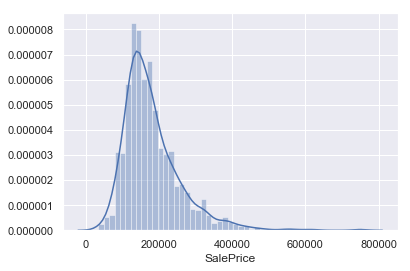

In [307]:
sns.distplot(target);

In [308]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [309]:
# 99 quantile
q = target.quantile(0.99)
q

442567.0100000005

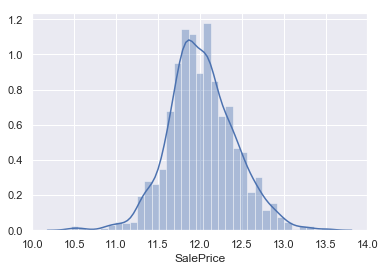

In [202]:
# Transform to log 'SalePrice' 
log_target = np.log(target)
sns.distplot(log_target);

Logarithmic 'SalePrice' looks better because normal destribution and I will use log_target as target variable.

### First model

I will separate data on train and test datasets and I will store test data for final prediction. <br>

In [248]:
train_data = clean_data[:train_index]
test_data = clean_data[train_index:]

print(train_data.shape)
print(test_data.shape)

(1460, 235)
(1459, 235)


In [249]:
# Get numerical features
numeric_features = list(train_data.select_dtypes(include=np.number).columns)

# Set X and y
X = train_data[numeric_features].values
y = log_target.values

In [271]:
def train_model(model_name, model, X, y):
    "Function checks model by cross validation."
    
    score = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    cross_score = np.sqrt(-score)
    print('{0}: '.format(model_name), np.mean(cross_score), cross_score)       

Let's try a few models.

In [251]:
models = {'RandomForest': RandomForestRegressor(),
         'ExtraTrees': ExtraTreesRegressor(),
         'XGB': XGBRegressor(),
         'SVR': SVR(),
         'KNN': KNeighborsRegressor()}

In [252]:
for model_name, model in models.items():
    train_model(model_name, model, X, y)
    print()

RandomForest:  0.1510893078490741 [0.14041548 0.16765956 0.15123614 0.13758518 0.15855018]

ExtraTrees:  0.14519144569127457 [0.13718804 0.15922111 0.14977574 0.13844921 0.14132313]

XGB:  0.1267309716683285 [0.11692159 0.14124235 0.12986022 0.12266897 0.12296174]

SVR:  0.3987862855709351 [0.38535591 0.42513603 0.40910736 0.3833547  0.39097743]

KNN:  0.22661521300052784 [0.2201296  0.23383169 0.23073821 0.21636724 0.23200934]



So, we got the first result. 

In [253]:
# Scale feature
X_scaled = StandardScaler().fit_transform(X)

for model_name, model in models.items():
    train_model(model_name, model, X_scaled, y)
    print()

RandomForest:  0.15226343271242876 [0.1441846  0.16379512 0.1539955  0.14128257 0.15805937]

ExtraTrees:  0.14733439216880215 [0.13009149 0.1608653  0.16001926 0.13568675 0.15000915]

XGB:  0.1267309716683285 [0.11692159 0.14124235 0.12986022 0.12266897 0.12296174]

SVR:  0.1862408209469865 [0.17864355 0.20095425 0.20568151 0.16041072 0.18551407]

KNN:  0.20268914474325433 [0.19809197 0.2168058  0.20299953 0.18920024 0.20634819]



Scaler improve some models like SVR, but for other models it doesn't affect in significant way. XGBoost perform the best result, I will work with it.

### Feature engineering

Let's create some new features and check if it will improve a model.

In [254]:
model = XGBRegressor()

In [311]:
def check_new_feat(new_feat):
    "Fast add new feature and check already exist model with this feature"
    
    train_data['New'] = new_feat
    
    numeric_features = list(train_data.select_dtypes(include=np.number).columns)
    X = train_data[numeric_features].values
    
    train_model('XGB', model, X, y)
    
    train_data.drop('New', axis=1, inplace=True)

In [312]:
check_new_feat(train_data['GarageArea'] / train_data['GarageCars'])

XGB:  0.12402825957926392 [0.128244   0.09971257 0.10753983 0.16679544 0.14565522 0.10620155
 0.13118123 0.10636547 0.11010877 0.13847851]


In [313]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['FullBath'])

XGB:  0.12393045233939722 [0.12804288 0.10078858 0.11000969 0.16436932 0.14560188 0.10762576
 0.12843005 0.10570213 0.11038166 0.13835256]


In [314]:
check_new_feat(train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB:  0.12307082333123331 [0.12909155 0.09438921 0.10816906 0.16226551 0.14325308 0.10614098
 0.13399795 0.10537121 0.11210653 0.13592318]


In [315]:
check_new_feat(train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'])

XGB:  0.12322901534817812 [0.1252041  0.09977273 0.10624473 0.16238746 0.14644716 0.10729772
 0.12759305 0.10532086 0.1118808  0.14014154]


In [316]:
check_new_feat(train_data['OverallQual'] + train_data['OverallCond'])

XGB:  0.12416583335234814 [0.12929943 0.09632575 0.11079105 0.16136056 0.14704166 0.10625747
 0.13728829 0.10658691 0.11019566 0.13651156]


In [317]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['BedroomAbvGr'])

XGB:  0.12323778222468271 [0.12647119 0.09729965 0.10993514 0.16483033 0.14720521 0.10415087
 0.12918283 0.10598871 0.10878802 0.13852586]


In [318]:
check_new_feat(train_data['YearRemodAdd'] - train_data['YearBuilt'])

XGB:  0.12389556743293532 [0.12533513 0.10046766 0.11101075 0.16493965 0.146231   0.10810321
 0.12982497 0.10571082 0.11126871 0.13606377]


In [319]:
check_new_feat(train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB:  0.12314717574135063 [0.11907976 0.10281909 0.1056159  0.15906186 0.14124661 0.11332677
 0.13360159 0.10712329 0.10839222 0.14120466]


In [320]:
check_new_feat(train_data['BsmtUnfSF']/train_data['TotalBsmtSF'])

XGB:  0.1245815921948683 [0.12593909 0.10128565 0.11164205 0.16619399 0.14613752 0.10585003
 0.13118312 0.10767226 0.11273476 0.13717746]


In [321]:
check_new_feat(train_data['GrLivArea']/train_data['TotRmsAbvGrd'])

XGB:  0.12398341345472019 [0.12476197 0.09716934 0.11036958 0.16590043 0.14678907 0.10414018
 0.1301842  0.10519678 0.11524375 0.14007883]


In [322]:
def add_new_feats(data):
    "Function add new features"
    data['Rooms_per_bath'] = data['TotRmsAbvGrd'] / data['BedroomAbvGr']
    data['TotalSF'] = data['1stFlrSF'] + data['2ndFlrSF']
    data['BsmtFin'] = data['BsmtFinSF1'] + data['BsmtFinSF2']
    
    return data

In [323]:
# In this time I will try model without new feats
train_data = add_new_feats(train_data)

In [324]:
# Try model with new features
numeric_features = list(train_data.select_dtypes(include=np.number).columns)
X = train_data[numeric_features].values
train_model('XGB', model, X, y)
len(numeric_features)

XGB:  0.12292495266286174 [0.12774565 0.09763645 0.10303652 0.16562032 0.14474755 0.10687405
 0.13419496 0.10588166 0.10993522 0.13357715]


206

### Optimize model 

Now, I'm going to find better parameters for model in order to improve result.

In [325]:
# Search better values for model parameters
parag_grid = {'n_estimators': np.arange(100, 1500),
             'learning_rate': np.arange(0.05, 1, 0.01),
             'max_depth': np.arange(1, 20),
             'colsample_bytree': np.arange(0, 1, 0.1)}

random_search = RandomizedSearchCV(model, parag_grid, cv=5, scoring='neg_mean_squared_error', n_iter=100)
random_search.fit(X, y)


random_search.best_params_

{'n_estimators': 1003,
 'max_depth': 2,
 'learning_rate': 0.13,
 'colsample_bytree': 0.6000000000000001}

In [326]:
# Try model with new parameters
model = XGBRegressor(n_estimators=1003, max_depth=2, learning_rate=0.13, colsample_bytree=0.6) 
train_model('XGB', model, X, y)

XGB:  0.12125389360512359 [0.12292357 0.09476993 0.10290375 0.16787557 0.14347563 0.10023051
 0.13461736 0.10559685 0.10595087 0.13419491]


In [327]:
# Final fit
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, importance_type='gain',
       learning_rate=0.13, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=1003, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

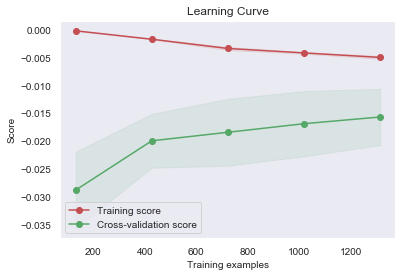

In [277]:
plot_learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error');

### Check model on test data

Now let's make prediction on test data and upload result to Kaggle and check how precise is it.

In [328]:
# Add new features
test_data = add_new_feats(test_data)

In [329]:
# Set X and make prediction
X_test = test_data[numeric_features].values

y_pred = np.exp(model.predict(X_test))

In [330]:
# Save result to csv file with 2 columns: Id and Price
test_file = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
test_file.to_csv('submission.csv', index=False)

So, currently I achieved 0.12700 score on Kaggle for my prediction (previos one was 0.12830), this result in first 27% participants (Kaggle use RMSLE metric).

Changes: <br>
 - Add new feats
 - Increase values range for model parameters and add colsample_bytree
 
 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard#score

